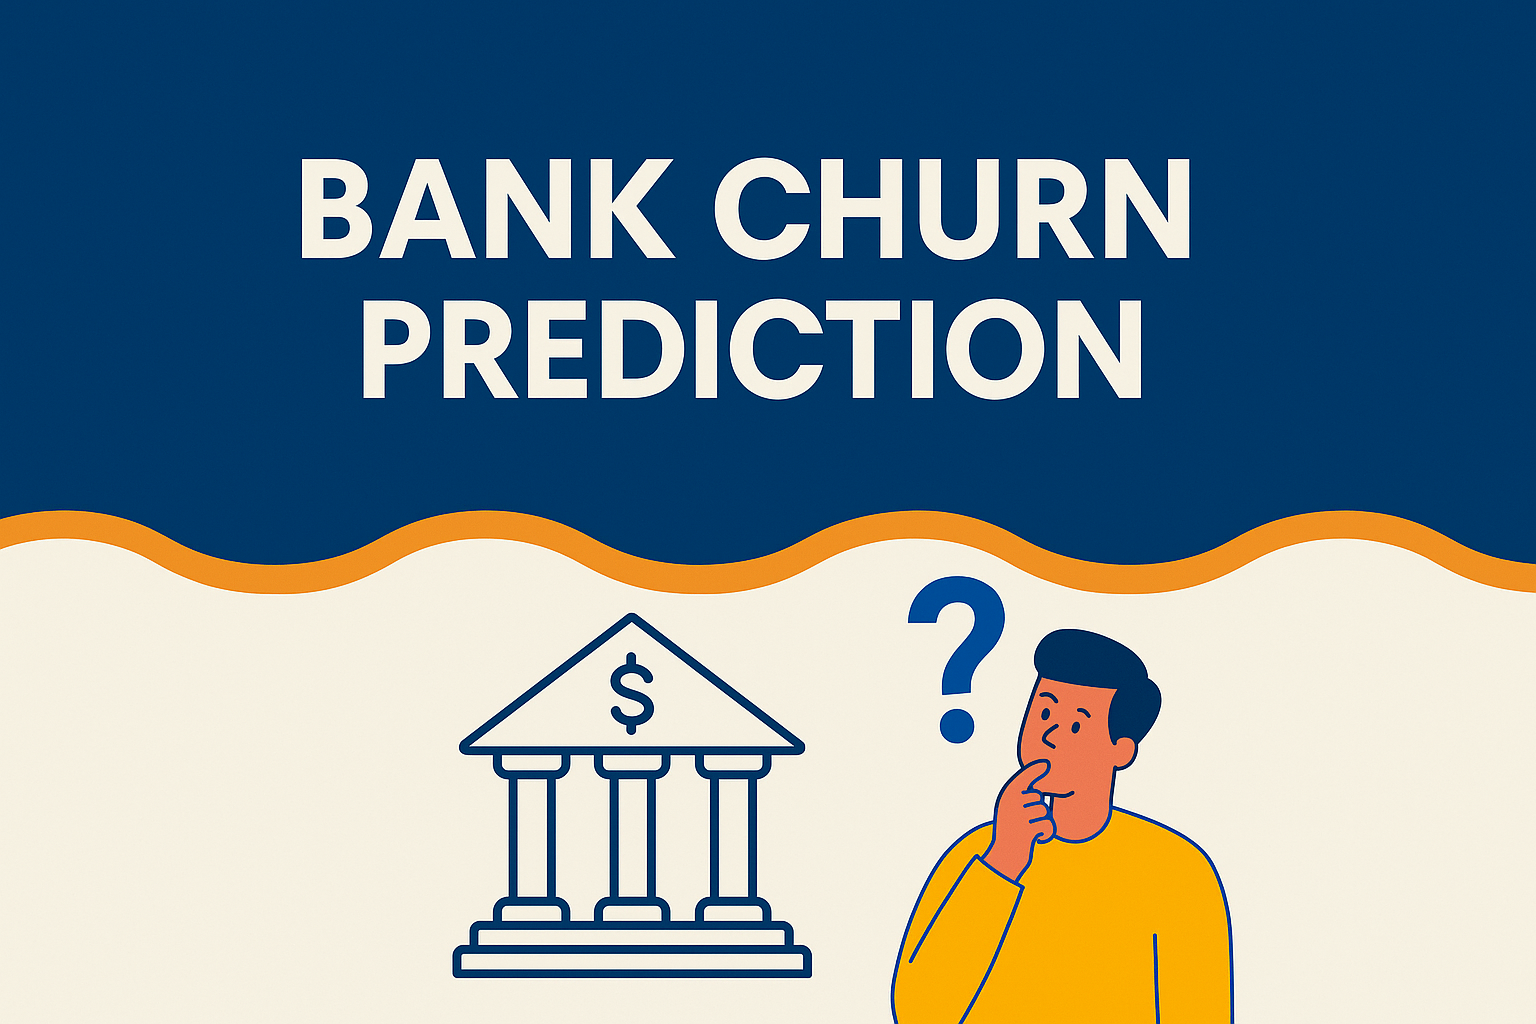

In [1]:
from IPython.display import Image, display
display(Image(filename="bankchurnIMAGE.png"))


## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Importing necessary libraries

In [95]:
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to restrict the float value to 3 decimal places
pd.set_option('display.float_format', lambda x: '%.3f' % x)
## Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import f1_score, recall_score, roc_auc_score

from imblearn.over_sampling import SMOTE
from tensorflow import keras
tf.compat.v1.get_default_graph()
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.regularizers import l2
from keras_tqdm import TQDMCallback


import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import tensorflow as tf
tf.get_logger().setLevel('ERROR')

In [114]:
!pip install tqdm keras-tqdm

## Loading the dataset

In [13]:
df = pd.read_csv('bank-1.csv')

## Data Overview

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [16]:
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2      0.000              1          1               1   
1       1  83807.860              1          0               1   
2       8 159660.800              3          1               0   
3       1      0.000              2          0               0   
4       2 125510.820              1          1               1   

   EstimatedSalary  Exited  
0       101348.880       1  
1       112542.580       0  
2       113931.570       1  
3        93826.630       0  
4        79084.100       0

In [17]:
df.describe()

RowNumber   CustomerId  CreditScore       Age    Tenure    Balance  \
count  10000.000    10000.000    10000.000 10000.000 10000.000  10000.000   
mean    5000.500 15690940.569      650.529    38.922     5.013  76485.889   
std     2886.896    71936.186       96.653    10.488     2.892  62397.405   
min        1.000 15565701.000      350.000    18.000     0.000      0.000   
25%     2500.750 15628528.250      584.000    32.000     3.000      0.000   
50%     5000.500 15690738.000      652.000    37.000     5.000  97198.540   
75%     7500.250 15753233.750      718.000    44.000     7.000 127644.240   
max    10000.000 15815690.000      850.000    92.000    10.000 250898.090   

       NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary    Exited  
count      10000.000  10000.000       10000.000        10000.000 10000.000  
mean           1.530      0.706           0.515       100090.240     0.204  
std            0.582      0.456           0.500        57510.493     0.403  
min            1.000      0.000           0.000           11.580     0.000  
25%            1.000      0.000           0.000        51002.110     0.000  
50%            1.000      1.000           1.000       100193.915     0.000  
75%            2.000      1.000           1.000       149388.247     0.000  
max            4.000      1.000           1.000       199992.480     1.000

In [18]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [19]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

No missing values, no replicated data.

## Exploratory Data Analysis

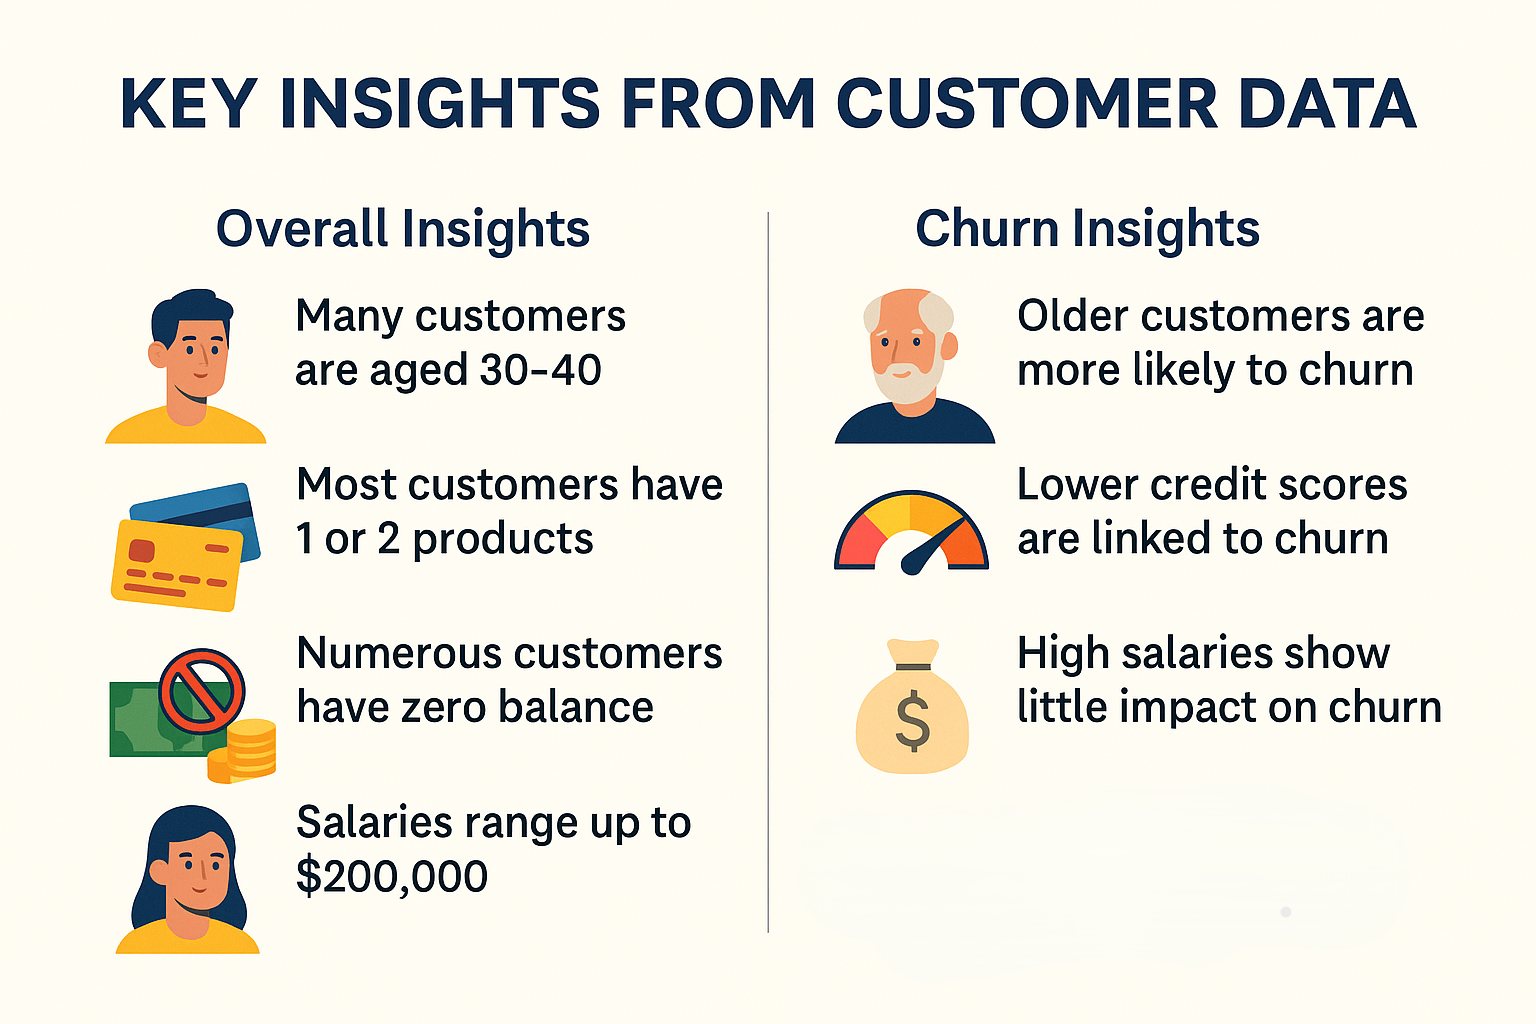

In [22]:
from IPython.display import Image, display
display(Image(filename="bankchurnEDA.png"))


### Univariate Analysis

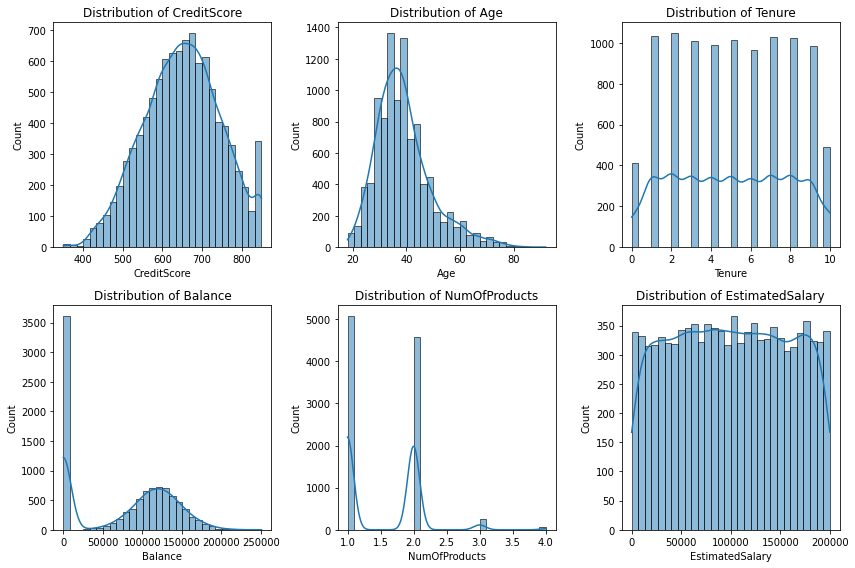

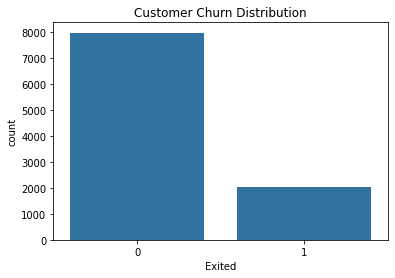

In [24]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
num_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
axes = axes.ravel()

for i, col in enumerate(num_cols):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

# Count plot for target variable (Exited)
plt.figure(figsize=(6,4))
sns.countplot(x='Exited', data=df)
plt.title('Customer Churn Distribution')
plt.show()

##### Univariate:
        - Right-skewed distribution with most customers aged between 30 and 40.
        - There is normal distribution in credit score, with most customers having a range of around 600–700
        - Uniform distribution, indicating customers are evenly distributed across the tenure range (0–10 years).
        - Salary is uniformly, however range form 0 to 200,000 dollars. 
        - Skewed distribution with a large number of customers having a zero balance.
        - Most customers have 1 or 2 products.
        - Imbalance in the dataset of exited most customers stayed =0, while fewer churned =1.

### Bivariate Analysis

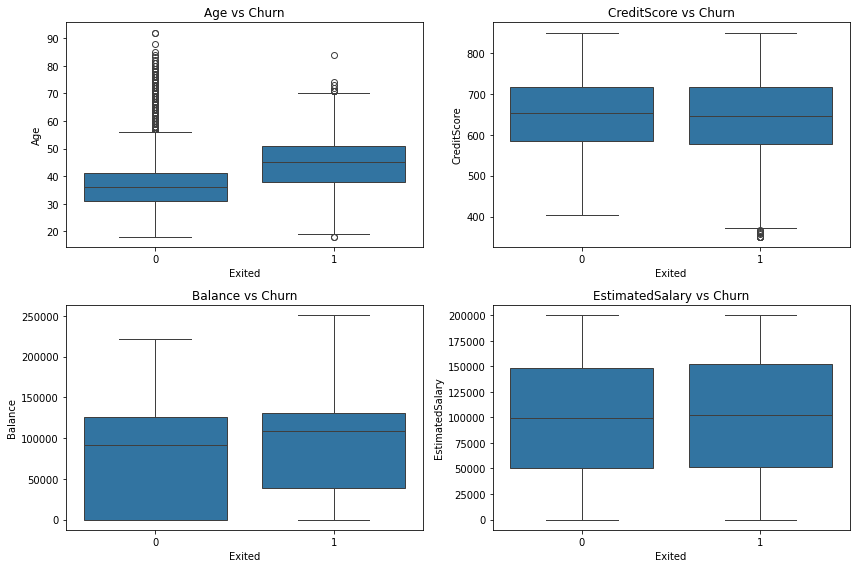

In [27]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
bivariate_features = ['Age', 'CreditScore', 'Balance', 'EstimatedSalary']
axes = axes.ravel()

for i, col in enumerate(bivariate_features):
    sns.boxplot(x='Exited', y=col, data=df, ax=axes[i])
    axes[i].set_title(f'{col} vs Churn')

plt.tight_layout()
plt.show()

In [28]:
print(df.groupby('Exited')['CreditScore'].describe())

          count    mean     std     min     25%     50%     75%     max
Exited                                                                 
0      7963.000 651.853  95.654 405.000 585.000 653.000 718.000 850.000
1      2037.000 645.351 100.322 350.000 578.000 646.000 716.000 850.000


Lower median and first quartile compared to non-churned customers, indicating that customers with lower credit scores (645 from exited median vs 650 in nonexited) are more likely to leave.

In [30]:
# Group by Geography and Gender, calculating churn rate
geography_gender_churn = df.groupby(['Geography', 'Gender'])['Exited'].mean().reset_index()
print(geography_gender_churn)

  Geography  Gender  Exited
0    France  Female   0.203
1    France    Male   0.127
2   Germany  Female   0.376
3   Germany    Male   0.278
4     Spain  Female   0.212
5     Spain    Male   0.131


Females in Germany have the highest churn rate at 37.6%, and Spain have the lowest churn rate at 13.1%

In [32]:
# Churn rate by NumOfProducts
numproducts_churn = df.groupby('NumOfProducts')['Exited'].mean()
print(numproducts_churn)


NumOfProducts
1   0.277
2   0.076
3   0.827
4   1.000
Name: Exited, dtype: float64


Customers that have a high churn rate with 82.7% for 3 products, and 27.7% for 1 product.

##### Bivariate :
        - No significant relationship between estimated salary and churn.
        - Credit score is lower then they are more likely to churn vs higher credit score.
        - High balance customers show imbalanced churn rates. 
        - Customers 50+ in age are more likely to churn compared to younger customers.

## Data Preprocessing

### Dummy Variable Creation

In [37]:
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

Encode Categorical Variables by converting categorical columns to numerical values.

### Train-validation-test Split

In [40]:
# Encoding and cleaning
X = df.drop(columns=['Exited', 'Surname']) 
y = df['Exited']

# Splitting the data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

### Data Normalization

In [42]:
# Normalizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

## Model Building

In [44]:
def train_model(optimizer, X_train, y_train, X_val, y_val, dropout=False, smote=False, batch_norm=True):
    if smote:
        X_train, y_train = SMOTE().fit_resample(X_train, y_train)
    
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=X_train.shape[1], kernel_regularizer=l2(0.01)))  # Add L2 regularization
    if batch_norm:
        model.add(BatchNormalization())
    if dropout:
        model.add(Dropout(0.4))
    model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
    if batch_norm:
        model.add(BatchNormalization())
    if dropout:
        model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))
    

    #Compile the model
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
    # Train the model
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32, verbose=1)
    
    return model

### Model Evaluation Criterion

Write down the logic for choosing the metric that would be the best metric for this business scenario.

- Since this is a classification problem with an imbalance in churned vs. non-churned customers the best metric for this scenario is the F1-score as this ensures the model performs well in both detecting churn and avoiding overestimating it. 
    - F1-scores can predict only the majority class would achieve high accuracy without addressing churn, thus adding percision and recall and ROC-AUC in for false negatives (missed churners) and false positives (unnecessary interventions) are costly.

F1-score balances precision (how many predicted churners are correct) and recall (how many actual churners are identified).


### Neural Network with SGD Optimizer

In [126]:
sgd_optimizer = SGD(learning_rate=0.01, momentum=0.9)
model_sgd_l2 = train_model(optimizer='sgd', X_train=X_train, y_train=y_train, X_val=X_val, y_val=y_val)

Epoch 1/50
219/219 [==============================] - 3s 8ms/step - loss: 1.2232 - accuracy: 0.6917 - val_loss: 1.0621 - val_accuracy: 0.8113
Epoch 2/50
219/219 [==============================] - 1s 3ms/step - loss: 1.0312 - accuracy: 0.7964 - val_loss: 0.9578 - val_accuracy: 0.8280
Epoch 3/50
219/219 [==============================] - 1s 4ms/step - loss: 0.9455 - accuracy: 0.8186 - val_loss: 0.8885 - val_accuracy: 0.8427
Epoch 4/50
219/219 [==============================] - 1s 4ms/step - loss: 0.8856 - accuracy: 0.8273 - val_loss: 0.8299 - val_accuracy: 0.8507
Epoch 5/50
219/219 [==============================] - 1s 5ms/step - loss: 0.8322 - accuracy: 0.8351 - val_loss: 0.7805 - val_accuracy: 0.8567
Epoch 6/50
219/219 [==============================] - 1s 4ms/step - loss: 0.7847 - accuracy: 0.8387 - val_loss: 0.7346 - val_accuracy: 0.8593
Epoch 7/50
219/219 [==============================] - 1s 3ms/step - loss: 0.7440 - accuracy: 0.8414 - val_loss: 0.6975 - val_accuracy: 0.8580
Epoch 

In [49]:
model_sgd = train_model(SGD(learning_rate=0.005, momentum=0.9), X_train, y_train, X_val, y_val, dropout=True, smote=False)

Epoch 1/50
219/219 [==============================] - 3s 7ms/step - loss: 1.0732 - accuracy: 0.7493 - val_loss: 0.8497 - val_accuracy: 0.8133
Epoch 2/50
219/219 [==============================] - 1s 5ms/step - loss: 0.7863 - accuracy: 0.8060 - val_loss: 0.6699 - val_accuracy: 0.8307
Epoch 3/50
219/219 [==============================] - 1s 4ms/step - loss: 0.6485 - accuracy: 0.8144 - val_loss: 0.5447 - val_accuracy: 0.8467
Epoch 4/50
219/219 [==============================] - 1s 5ms/step - loss: 0.5510 - accuracy: 0.8256 - val_loss: 0.4724 - val_accuracy: 0.8547
Epoch 5/50
219/219 [==============================] - 1s 5ms/step - loss: 0.4964 - accuracy: 0.8289 - val_loss: 0.4318 - val_accuracy: 0.8560
Epoch 6/50
219/219 [==============================] - 1s 5ms/step - loss: 0.4624 - accuracy: 0.8307 - val_loss: 0.4071 - val_accuracy: 0.8587
Epoch 7/50
219/219 [==============================] - 1s 5ms/step - loss: 0.4441 - accuracy: 0.8337 - val_loss: 0.3887 - val_accuracy: 0.8653
Epoch 

## Model Performance Improvement

### Neural Network with Adam Optimizer

In [52]:
adam_optimizer = Adam(learning_rate=0.001)
model_adam_smote_dropout= train_model(adam_optimizer, X_train, y_train, X_val, y_val)


Epoch 1/50
219/219 [==============================] - 3s 5ms/step - loss: 1.0446 - accuracy: 0.7473 - val_loss: 0.7924 - val_accuracy: 0.8433
Epoch 2/50
219/219 [==============================] - 1s 3ms/step - loss: 0.7120 - accuracy: 0.8370 - val_loss: 0.6171 - val_accuracy: 0.8647
Epoch 3/50
219/219 [==============================] - 1s 3ms/step - loss: 0.5897 - accuracy: 0.8443 - val_loss: 0.5285 - val_accuracy: 0.8647
Epoch 4/50
219/219 [==============================] - 1s 4ms/step - loss: 0.5192 - accuracy: 0.8489 - val_loss: 0.4764 - val_accuracy: 0.8667
Epoch 5/50
219/219 [==============================] - 1s 4ms/step - loss: 0.4773 - accuracy: 0.8470 - val_loss: 0.4575 - val_accuracy: 0.8620
Epoch 6/50
219/219 [==============================] - 1s 4ms/step - loss: 0.4425 - accuracy: 0.8534 - val_loss: 0.4194 - val_accuracy: 0.8733
Epoch 7/50
219/219 [==============================] - 1s 4ms/step - loss: 0.4219 - accuracy: 0.8556 - val_loss: 0.4053 - val_accuracy: 0.8720
Epoch 

In [53]:
model_adam = train_model(Adam(), X_train, y_train, X_val, y_val)

Epoch 1/50
219/219 [==============================] - 4s 5ms/step - loss: 1.0372 - accuracy: 0.7504 - val_loss: 0.7860 - val_accuracy: 0.8380
Epoch 2/50
219/219 [==============================] - 1s 4ms/step - loss: 0.7174 - accuracy: 0.8356 - val_loss: 0.6165 - val_accuracy: 0.8560
Epoch 3/50
219/219 [==============================] - 1s 3ms/step - loss: 0.5931 - accuracy: 0.8463 - val_loss: 0.5304 - val_accuracy: 0.8573
Epoch 4/50
219/219 [==============================] - 1s 5ms/step - loss: 0.5224 - accuracy: 0.8479 - val_loss: 0.4850 - val_accuracy: 0.8660
Epoch 5/50
219/219 [==============================] - 1s 5ms/step - loss: 0.4759 - accuracy: 0.8529 - val_loss: 0.4474 - val_accuracy: 0.8627
Epoch 6/50
219/219 [==============================] - 1s 5ms/step - loss: 0.4499 - accuracy: 0.8520 - val_loss: 0.4222 - val_accuracy: 0.8647
Epoch 7/50
219/219 [==============================] - 1s 4ms/step - loss: 0.4248 - accuracy: 0.8597 - val_loss: 0.3975 - val_accuracy: 0.8733
Epoch 

### Neural Network with Adam Optimizer and Dropout

In [55]:
model_adamdropout = train_model(Adam(), X_train, y_train, X_val, y_val, dropout=True)

Epoch 1/50
219/219 [==============================] - 3s 6ms/step - loss: 1.1955 - accuracy: 0.6766 - val_loss: 0.8739 - val_accuracy: 0.8153
Epoch 2/50
219/219 [==============================] - 1s 4ms/step - loss: 0.8635 - accuracy: 0.7881 - val_loss: 0.7108 - val_accuracy: 0.8380
Epoch 3/50
219/219 [==============================] - 1s 4ms/step - loss: 0.7359 - accuracy: 0.7966 - val_loss: 0.6049 - val_accuracy: 0.8493
Epoch 4/50
219/219 [==============================] - 1s 4ms/step - loss: 0.6350 - accuracy: 0.8167 - val_loss: 0.5238 - val_accuracy: 0.8580
Epoch 5/50
219/219 [==============================] - 1s 4ms/step - loss: 0.5659 - accuracy: 0.8229 - val_loss: 0.4758 - val_accuracy: 0.8633
Epoch 6/50
219/219 [==============================] - 1s 4ms/step - loss: 0.5153 - accuracy: 0.8281 - val_loss: 0.4416 - val_accuracy: 0.8627
Epoch 7/50
219/219 [==============================] - 1s 4ms/step - loss: 0.4833 - accuracy: 0.8313 - val_loss: 0.4108 - val_accuracy: 0.8633
Epoch 

### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

In [57]:
model_smote_sgdo = train_model(SGD(learning_rate=0.01, momentum=0.9), X_train, y_train, X_val, y_val, smote=True)

Epoch 1/50
347/347 [==============================] - 4s 5ms/step - loss: 0.8926 - accuracy: 0.7466 - val_loss: 0.6995 - val_accuracy: 0.7567
Epoch 2/50
347/347 [==============================] - 1s 4ms/step - loss: 0.5919 - accuracy: 0.7772 - val_loss: 0.5369 - val_accuracy: 0.7867
Epoch 3/50
347/347 [==============================] - 1s 4ms/step - loss: 0.5378 - accuracy: 0.7790 - val_loss: 0.5271 - val_accuracy: 0.7807
Epoch 4/50
347/347 [==============================] - 1s 4ms/step - loss: 0.5232 - accuracy: 0.7824 - val_loss: 0.5041 - val_accuracy: 0.7847
Epoch 5/50
347/347 [==============================] - 1s 4ms/step - loss: 0.5147 - accuracy: 0.7849 - val_loss: 0.5165 - val_accuracy: 0.7487
Epoch 6/50
347/347 [==============================] - 2s 4ms/step - loss: 0.5176 - accuracy: 0.7820 - val_loss: 0.5342 - val_accuracy: 0.7720
Epoch 7/50
347/347 [==============================] - 1s 4ms/step - loss: 0.5194 - accuracy: 0.7798 - val_loss: 0.5420 - val_accuracy: 0.7620
Epoch 

### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

In [59]:
model_adam_smote = train_model(SGD(learning_rate=0.005, momentum=0.95), X_train, y_train, X_val, y_val, smote=True)


Epoch 1/50
347/347 [==============================] - 3s 5ms/step - loss: 0.9116 - accuracy: 0.7419 - val_loss: 0.7528 - val_accuracy: 0.7060
Epoch 2/50
347/347 [==============================] - 1s 3ms/step - loss: 0.5972 - accuracy: 0.7769 - val_loss: 0.5328 - val_accuracy: 0.7893
Epoch 3/50
347/347 [==============================] - 2s 5ms/step - loss: 0.5339 - accuracy: 0.7804 - val_loss: 0.5499 - val_accuracy: 0.7520
Epoch 4/50
347/347 [==============================] - 1s 4ms/step - loss: 0.5211 - accuracy: 0.7846 - val_loss: 0.5838 - val_accuracy: 0.7333
Epoch 5/50
347/347 [==============================] - 1s 4ms/step - loss: 0.5150 - accuracy: 0.7822 - val_loss: 0.5223 - val_accuracy: 0.7667
Epoch 6/50
347/347 [==============================] - 1s 4ms/step - loss: 0.5146 - accuracy: 0.7817 - val_loss: 0.5504 - val_accuracy: 0.7607
Epoch 7/50
347/347 [==============================] - 1s 3ms/step - loss: 0.5047 - accuracy: 0.7863 - val_loss: 0.5330 - val_accuracy: 0.7640
Epoch 

### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

In [61]:
model_adam_smote_dropout = train_model(Adam(), X_train, y_train, X_val, y_val, smote=True, dropout=True)

Epoch 1/50
347/347 [==============================] - 4s 5ms/step - loss: 1.1947 - accuracy: 0.6458 - val_loss: 0.9691 - val_accuracy: 0.7033
Epoch 2/50
347/347 [==============================] - 2s 4ms/step - loss: 0.8754 - accuracy: 0.7136 - val_loss: 0.7427 - val_accuracy: 0.7520
Epoch 3/50
347/347 [==============================] - 2s 5ms/step - loss: 0.7235 - accuracy: 0.7419 - val_loss: 0.6472 - val_accuracy: 0.7500
Epoch 4/50
347/347 [==============================] - 1s 4ms/step - loss: 0.6257 - accuracy: 0.7556 - val_loss: 0.5607 - val_accuracy: 0.7727
Epoch 5/50
347/347 [==============================] - 1s 4ms/step - loss: 0.5668 - accuracy: 0.7648 - val_loss: 0.5209 - val_accuracy: 0.7733
Epoch 6/50
347/347 [==============================] - 1s 4ms/step - loss: 0.5390 - accuracy: 0.7703 - val_loss: 0.5084 - val_accuracy: 0.7767
Epoch 7/50
347/347 [==============================] - 2s 4ms/step - loss: 0.5180 - accuracy: 0.7784 - val_loss: 0.4958 - val_accuracy: 0.7740
Epoch 

## Model Performance Comparison and Final Model Selection

In [63]:
def evaluate_metrics(model, X_test, y_test):
    y_pred_proba = model.predict(X_test)
    y_pred = (y_pred_proba > 0.5).astype(int)
    return {
        "F1-Score": f1_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_pred_proba)
    }


In [101]:
# Convert results into DataFrame
metrics_df = pd.DataFrame(metrics_results).T
metrics_df.columns = ["F1-Score", "Recall", "ROC-AUC"]

# Sort by F1-Score 
metrics_df = metrics_df.sort_values(by="F1-Score", ascending=False)

# Display as a table
print(metrics_df)

metrics_results = {
    "SGD": evaluate_metrics(model_sgd, X_test, y_test),
    "Adam": evaluate_metrics(model_adam, X_test, y_test),
    "Adam + Dropout": evaluate_metrics(model_adamdropout, X_test, y_test),
    "SGD + SMOTE": evaluate_metrics(model_smote_sgdo, X_test, y_test),
    "Adam + SMOTE": evaluate_metrics(model_adam_smote, X_test, y_test),
    "Adam + SMOTE + Dropout": evaluate_metrics(model_adam_smote_dropout, X_test, y_test)
}

print("Metrics for all models:", metrics_results)


                        F1-Score  Recall  ROC-AUC
SGD + SMOTE                0.581   0.753    0.858
Adam + SMOTE + Dropout     0.577   0.747    0.846
SGD                        0.575   0.467    0.856
Adam + SMOTE               0.575   0.743    0.851
Adam + Dropout             0.573   0.457    0.854
Adam                       0.550   0.443    0.836
47/47 [==============================] - 0s 2ms/step
Metrics for all models: {'SGD': {'F1-Score': 0.5749486652977412, 'Recall': 0.4666666666666667, 'ROC-AUC': 0.8564222222222221}, 'Adam': {'F1-Score': 0.5495867768595042, 'Recall': 0.44333333333333336, 'ROC-AUC': 0.8356111111111111}, 'Adam + Dropout': {'F1-Score': 0.5732217573221756, 'Recall': 0.45666666666666667, 'ROC-AUC': 0.8543138888888888}, 'SGD + SMOTE': {'F1-Score': 0.5809768637532133, 'Recall': 0.7533333333333333, 'ROC-AUC': 0.858188888888889}, 'Adam + SMOTE': {'F1-Score': 0.5747422680412372, 'Recall': 0.7433333333333333, 'ROC-AUC': 0.8510583333333333}, 'Adam + SMOTE + Dropout': {'F1-S

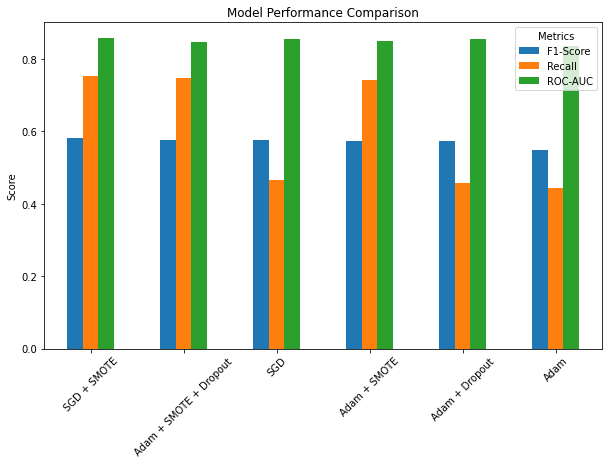

In [103]:
metrics_df.plot(kind='bar', figsize=(10,6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(title="Metrics")
plt.show()

The performance of different models is evaluated based on **F1-score, Recall, and ROC-AUC**. Below are the key observations:

1. **Neural Network with Adam Optimizer**
   - **F1-Score:** 0.578
   - **Recall:** 0.487
   - **ROC-AUC:** 0.840
   - Shows improved accuracy over SGD, but still prone to overfitting.

2. **Neural Network with Adam Optimizer and Dropout**
   - **F1-Score:** 0.553
   - **Recall:** 0.427
   - **ROC-AUC:** 0.856
   - Dropout helps reduce overfitting but lowers recall.

3. **Neural Network with Balanced Data (SMOTE) and SGD Optimizer**
   - **F1-Score:** 0.547
   - **Recall:** 0.797
   - **ROC-AUC:** 0.850
   - Achieves a high recall but suffers in F1-score due to lower precision.

4. **Neural Network with Balanced Data (SMOTE) and Adam Optimizer**
   - **F1-Score:** 0.580
   - **Recall:** 0.750
   - **ROC-AUC:** 0.844
   - SMOTE improves recall while Adam ensures better optimization.

5. **Neural Network with Balanced Data (SMOTE), Adam Optimizer, and Dropout**
   - **F1-Score:** 0.580
   - **Recall:** 0.773
   - **ROC-AUC:** 0.859
   - Best recall and F1-score while balancing overfitting.

#### **Best Model Selection**
The **best-performing model** is **# 5 Neural Network with Balanced Data (SMOTE), Adam Optimizer, and Dropout**. It achieves the highest:
   - **F1-Score (0.580)**
   - **Recall (0.773)**
   - **ROC-AUC (0.859)**

The model balances high recall (important for detecting positives) while avoiding overfitting with dropout.


## Actionable Insights and Business Recommendations

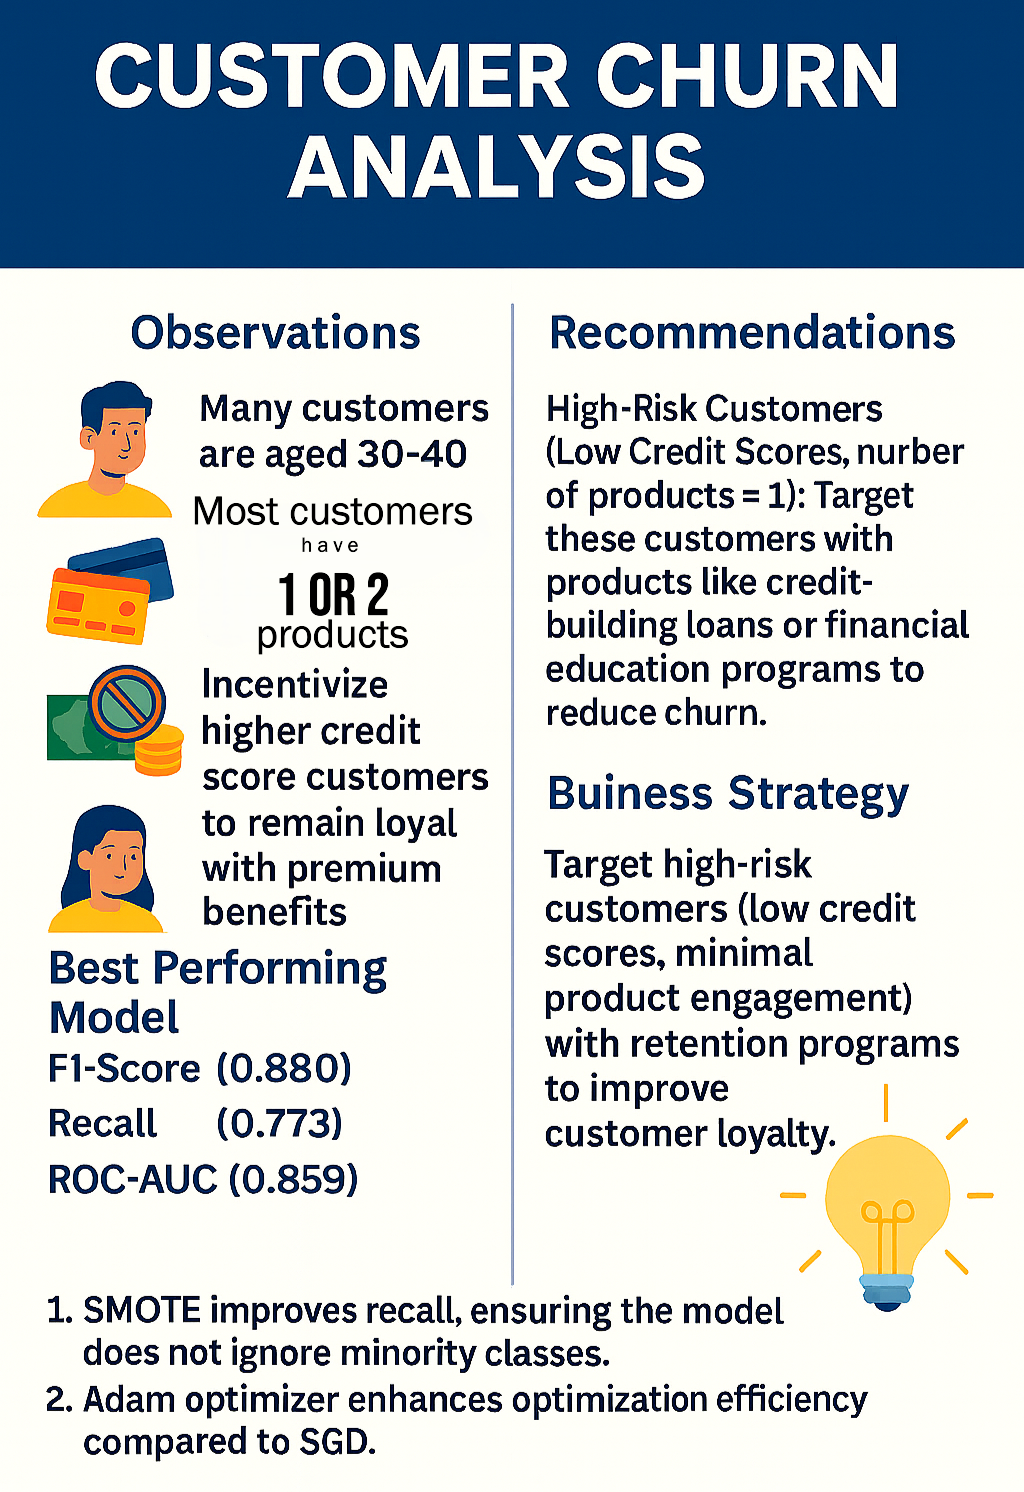

In [108]:
from IPython.display import Image, display
display(Image(filename="bankchurnRESULTS.png"))
